# Emotion analysis

## Preliminary

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Read in dataset, include NA values (unwanted characters) 
spotify_data = pd.read_csv("Final_database.csv", na_values=['n', 'n ', 'n-a','#', 'n', ' '], low_memory = False)
spotify_data.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic


In [4]:
#Create lists of columns for norm analysis
#Norm 1
emotionscolumns = [
'anger_norm',
 'anticipation_norm',
 'disgust_norm',
 'fear_norm',
 'joy_norm',
 'sadness_norm',
 'surprise_norm',
 'trust_norm'
]

#Norm 2
emotionscolumns2 = [
'anger_norm2',
 'anticipation_norm2',
 'disgust_norm2',
 'fear_norm2',
 'joy_norm2',
 'sadness_norm2',
 'surprise_norm2',
 'trust_norm2'
]

#Emotion column name
emotionscolumns_rename = [
'Anger',
 'Anticipation',
 'Disgust',
 'Fear',
 'Joy',
 'Sadness',
 'Surprise',
 'Trust'
]

## Emotions vs Genre

In [5]:
#Create a dataset with emotion norms, Popularity, Title and Genre
df_genre = spotify_data[emotionscolumns + ["Popularity", "Title", "Genre"]]

#Remove rows with NaN values in emotions
df_genre = df_genre[~df_genre.anger_norm.isna()]

#Aggregate by genre
df_genre = df_genre.groupby("Genre").agg({
    "Popularity":"sum", #Sum the popularity across countries
    'anger_norm': 'first', #Keep the first emotion norm value
     'anticipation_norm': 'first',
     'disgust_norm': 'first',
     'fear_norm': 'first',
     'joy_norm': 'first',
     'sadness_norm': 'first',
     'surprise_norm': 'first',
     'trust_norm': 'first',
})

#Select top 10 genres
df_genre = df_genre.sort_values("Popularity", ascending=False).head(10)
df_genre

,Popularity,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm
Genre,,,,,,,,,
dance pop,1.166727e+08,0.000000,0.003650,0.000000,0.003650,0.003650,0.007299,0.000000,0.003650
pop,4.984010e+07,0.003717,0.011152,0.003717,0.011152,0.007435,0.018587,0.003717,0.011152
dfw rap,1.333335e+07,0.018957,0.009479,0.009479,0.007109,0.011848,0.007109,0.004739,0.014218
electropop,1.249356e+07,0.007634,0.000000,0.015267,0.015267,0.007634,0.007634,0.000000,0.000000
big room,1.162233e+07,0.010870,0.010870,0.003623,0.000000,0.007246,0.007246,0.003623,0.010870
edm,1.135726e+07,0.012579,0.012579,0.003145,0.012579,0.028302,0.012579,0.012579,0.034591
canadian hip hop,1.133097e+07,0.018576,0.015480,0.010836,0.009288,0.015480,0.012384,0.013932,0.017028
canadian pop,9.988964e+06,0.000000,0.020725,0.000000,0.005181,0.031088,0.015544,0.005181,0.020725
emo rap,9.448483e+06,0.026012,0.005780,0.023121,0.011561,0.011561,0.011561,0.011561,0.005780


In [6]:
#Rename index to include their ranking by popularity (for visualization)
df_genre = df_genre.rename(index={'edm': 'Edm - 6th',
                                    'dance pop': 'Dance Pop - 1st',
                                    'pop': 'Pop - 2nd',
                                    'dfw rap': 'DFW Rap - 3rd',
                                    'electropop': "Electropop - 4th",
                                   'big room': "Big Room - 5th",
                                   'canadian hip hop': 'Canadian Hip Hop - 7th',
                                   'canadian pop': 'Canadian Pop - 8th',
                                   'emo rap': 'Emo Rap - 9th',
                                   'modern rock': 'Modern Rock - 10th'})
df_genre

,Popularity,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm
Genre,,,,,,,,,
Dance Pop - 1st,1.166727e+08,0.000000,0.003650,0.000000,0.003650,0.003650,0.007299,0.000000,0.003650
Pop - 2nd,4.984010e+07,0.003717,0.011152,0.003717,0.011152,0.007435,0.018587,0.003717,0.011152
DFW Rap - 3rd,1.333335e+07,0.018957,0.009479,0.009479,0.007109,0.011848,0.007109,0.004739,0.014218
Electropop - 4th,1.249356e+07,0.007634,0.000000,0.015267,0.015267,0.007634,0.007634,0.000000,0.000000
Big Room - 5th,1.162233e+07,0.010870,0.010870,0.003623,0.000000,0.007246,0.007246,0.003623,0.010870
Edm - 6th,1.135726e+07,0.012579,0.012579,0.003145,0.012579,0.028302,0.012579,0.012579,0.034591
Canadian Hip Hop - 7th,1.133097e+07,0.018576,0.015480,0.010836,0.009288,0.015480,0.012384,0.013932,0.017028
Canadian Pop - 8th,9.988964e+06,0.000000,0.020725,0.000000,0.005181,0.031088,0.015544,0.005181,0.020725
Emo Rap - 9th,9.448483e+06,0.026012,0.005780,0.023121,0.011561,0.011561,0.011561,0.011561,0.005780


In [7]:
#Create a column for total emotion
df_genre["emotions_sum"] = df_genre[emotionscolumns].sum(axis = 1)

#Rename emotion columns (for visualization)
df_genre = df_genre.rename(columns={'anger_norm': "Anger",
                                    'anticipation_norm': "Anticipation",
                                    'disgust_norm': "Disgust",
                                    'fear_norm': "Fear",
                                    'joy_norm': "Joy",
                                    'sadness_norm': "Sadness",
                                    'surprise_norm':"Surprise",
                                    'trust_norm': "Trust"})

df_genre

,Popularity,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,emotions_sum
Genre,,,,,,,,,,
Dance Pop - 1st,1.166727e+08,0.000000,0.003650,0.000000,0.003650,0.003650,0.007299,0.000000,0.003650,0.021898
Pop - 2nd,4.984010e+07,0.003717,0.011152,0.003717,0.011152,0.007435,0.018587,0.003717,0.011152,0.070632
DFW Rap - 3rd,1.333335e+07,0.018957,0.009479,0.009479,0.007109,0.011848,0.007109,0.004739,0.014218,0.082938
Electropop - 4th,1.249356e+07,0.007634,0.000000,0.015267,0.015267,0.007634,0.007634,0.000000,0.000000,0.053435
Big Room - 5th,1.162233e+07,0.010870,0.010870,0.003623,0.000000,0.007246,0.007246,0.003623,0.010870,0.054348
Edm - 6th,1.135726e+07,0.012579,0.012579,0.003145,0.012579,0.028302,0.012579,0.012579,0.034591,0.128931
Canadian Hip Hop - 7th,1.133097e+07,0.018576,0.015480,0.010836,0.009288,0.015480,0.012384,0.013932,0.017028,0.113003
Canadian Pop - 8th,9.988964e+06,0.000000,0.020725,0.000000,0.005181,0.031088,0.015544,0.005181,0.020725,0.098446
Emo Rap - 9th,9.448483e+06,0.026012,0.005780,0.023121,0.011561,0.011561,0.011561,0.011561,0.005780,0.106936


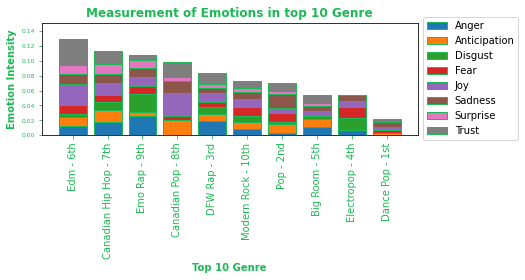

In [8]:
##Visualization of top 10 genres broken down by emotions in order of total sum of emotions
#Sort total emotion values (for visualization)
a = df_genre.sort_values("emotions_sum", ascending = False)
#Filter dataframe for emotions
a = a[emotionscolumns_rename]
#Get list of Genres
cols = a.index.tolist()
#Stacked bar plot
for i in range(len(emotionscolumns_rename)):
    height = a[emotionscolumns_rename[i]] #Bar height
    bottom = a[emotionscolumns_rename[:i]].sum(axis=1) #Get the bottom of the bar
    label=emotionscolumns_rename[i] #Get the legend label
    plt.bar(x=cols, height=height, edgecolor="#1DB954", bottom=bottom, label=label)
plt.title('Measurement of Emotions in top 10 Genre', weight='bold', color="#1DB954")
plt.legend(bbox_to_anchor=(1, 1.1))
plt.ylim(0,0.15)
plt.xlabel('Top 10 Genre', weight='bold', color="#1DB954")
plt.ylabel("Emotion Intensity", weight='bold', color="#1DB954")
plt.tick_params(axis='x', colors="#1DB954", labelsize=10, rotation=90)
plt.tick_params(axis='y', colors="#1DB954", labelsize=6)
plt.tight_layout()

plt.savefig('top_genres_by_emotion.png', transparent=True, dpi=500)

## Top 200 song emotions

In [9]:
#Create a dataset with emotion norms, Popularity and Title
df_group = spotify_data[emotionscolumns + ["Popularity", "Title"]]

#Remove rows with NaN values in emotions
df_group = df_group[~df_group.anger_norm.isna()]

#Aggregate data by Title
df_group = df_group.groupby(by = "Title").agg({
    "Popularity":"sum", #Sum the popularity across countries
    'anger_norm': 'first', #Keep the first emotion norm value
     'anticipation_norm': 'first',
     'disgust_norm': 'first',
     'fear_norm': 'first',
     'joy_norm': 'first',
     'sadness_norm': 'first',
     'surprise_norm': 'first',
     'trust_norm': 'first'
})

#Get top 200 songs by popularity
df_group = df_group.sort_values("Popularity", ascending=False).head(200)

In [10]:
#Create a column for total emotion
df_group["emotions_sum"] = df_group[emotionscolumns].sum(axis = 1)

#Rename emotion columns (for visualization)
df_group = df_group.rename(columns={'anger_norm': "Anger",
                                    'anticipation_norm': "Anticipation",
                                    'disgust_norm': "Disgust",
                                    'fear_norm': "Fear",
                                    'joy_norm': "Joy",
                                    'sadness_norm': "Sadness",
                                    'surprise_norm':"Surprise",
                                    'trust_norm': "Trust"})
df_group

,Popularity,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,emotions_sum
Title,,,,,,,,,,
shape of you,5733530.35,0.003396,0.005093,0.003396,0.001698,0.006791,0.005093,0.006791,0.006791,0.039049
rockstar,4191722.65,0.022005,0.009780,0.007335,0.014670,0.017115,0.007335,0.007335,0.019560,0.105134
dance monkey,3625305.45,0.000000,0.005747,0.000000,0.002874,0.005747,0.002874,0.000000,0.005747,0.022989
señorita,3051993.10,0.007299,0.018248,0.003650,0.000000,0.010949,0.007299,0.010949,0.003650,0.062044
bad guy,3040658.15,0.016854,0.016854,0.016854,0.016854,0.016854,0.033708,0.011236,0.016854,0.146067
...,...,...,...,...,...,...,...,...,...,...
bruises,571327.05,0.003636,0.003636,0.010909,0.003636,0.007273,0.010909,0.007273,0.010909,0.058182
i love it,569806.05,0.006024,0.006024,0.009036,0.009036,0.003012,0.009036,0.000000,0.000000,0.042169
last christmas,565313.85,0.000000,0.010230,0.002558,0.012788,0.023018,0.002558,0.007673,0.017903,0.076726


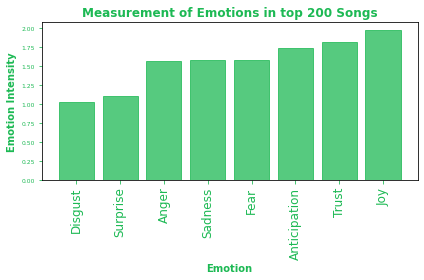

In [17]:
#Bar chart showing proportion of emotions in all top 200 songs using norm rates
#norm rates are normalized by total emotional words within all songs
#Filter dataframe for emotions
a = df_group[emotionscolumns_rename]
#Sum emotions
a = a.sum(axis=0)
#Sort in ascending order
a = a.sort_values(ascending=True)

#Generate bar plot
plt.bar(x=a.index, height=a, facecolor="#1DB954", edgecolor="#1DB954", alpha=0.75)
plt.title('Measurement of Emotions in top 200 Songs', weight='bold', color="#1DB954")
plt.xlabel('Emotion', weight='bold', color="#1DB954")
plt.ylabel("Emotion Intensity", weight='bold', color="#1DB954")
plt.tick_params(axis='x', colors="#1DB954", labelsize=12, rotation=90)
plt.tick_params(axis='y', colors="#1DB954", labelsize=6)
plt.tight_layout()
plt.savefig('top_emotions.png', transparent=True, dpi=500)

# Additional experiments

## Stacked bar plot for emotion prevalence

In [12]:
#Create a dataset with emotion norms, Popularity and Title
df_norm2 = spotify_data[emotionscolumns2 + ["Popularity", "Title", "Genre"]]

#Remove rows with NaN values in emotions
df_norm2 = df_norm2[~df_norm2.anger_norm2.isna()]

#Aggregate data by Title
df_norm2 = df_norm2.groupby("Title").agg({
    "Popularity":"sum", #Sum the popularity across countries
    'anger_norm2': 'first', #Keep the first emotion norm value
     'anticipation_norm2': 'first',
     'disgust_norm2': 'first',
     'fear_norm2': 'first',
     'joy_norm2': 'first',
     'sadness_norm2': 'first',
     'surprise_norm2': 'first',
     'trust_norm2': 'first',
    'Genre': 'first'
})

#Get top 200 songs by popularity
df_norm2 = df_norm2.sort_values("Popularity", ascending=False).head(200)

#Assign rank for each song ordered by popularity for better visualization ordered by popularity
df_norm2["pop_rank"] = df_norm2["Popularity"].rank()
df_norm2

,Popularity,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,Genre,pop_rank
Title,,,,,,,,,,,
shape of you,5733530.35,0.086957,0.130435,0.086957,0.043478,0.173913,0.130435,0.173913,0.173913,pop,200.0
rockstar,4191722.65,0.209302,0.093023,0.069767,0.139535,0.162791,0.069767,0.069767,0.186047,italian hip hop,199.0
dance monkey,3625305.45,0.000000,0.250000,0.000000,0.125000,0.250000,0.125000,0.000000,0.250000,australian pop,198.0
señorita,3051993.10,0.117647,0.294118,0.058824,0.000000,0.176471,0.117647,0.176471,0.058824,canadian pop,197.0
bad guy,3040658.15,0.115385,0.115385,0.115385,0.115385,0.115385,0.230769,0.076923,0.115385,electropop,196.0
...,...,...,...,...,...,...,...,...,...,...,...
bruises,571327.05,0.062500,0.062500,0.187500,0.062500,0.125000,0.187500,0.125000,0.187500,pop,5.0
i love it,569806.05,0.142857,0.142857,0.214286,0.214286,0.071429,0.214286,0.000000,0.000000,chicago rap,4.0
last christmas,565313.85,0.000000,0.133333,0.033333,0.166667,0.300000,0.033333,0.100000,0.233333,dance pop,3.0


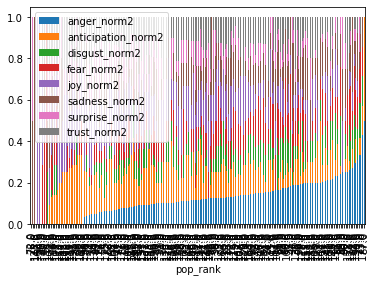

In [13]:
#visualize breakdown of emotions per song - not in order of popularity, aggregated by emotion. No recognizable trend
#Sort values for easier visualization
a = df_norm2.sort_values(emotionscolumns2)
#Filter dataframe for emotions
a = a[emotionscolumns2+['pop_rank']]
#Create stacked bar plot
a = a.plot.bar(x="pop_rank", stacked=True)

#Notice there is no recognizable trend

## Popularity vs emotions

In [14]:
#Create new column to establish prevalent emotion in each song and ordered by popularity - no recognizable trend 
df_group["prevalentemotion"] = df_group[emotionscolumns_rename].idxmax(axis = 1)

#Assign rank for each song ordered by popularity for better visualization ordered by popularity
df_group["pop_rank"] = df_group["Popularity"].rank()

df_group

,Popularity,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,emotions_sum,prevalentemotion,pop_rank
Title,,,,,,,,,,,,
shape of you,5733530.35,0.003396,0.005093,0.003396,0.001698,0.006791,0.005093,0.006791,0.006791,0.039049,Joy,200.0
rockstar,4191722.65,0.022005,0.009780,0.007335,0.014670,0.017115,0.007335,0.007335,0.019560,0.105134,Anger,199.0
dance monkey,3625305.45,0.000000,0.005747,0.000000,0.002874,0.005747,0.002874,0.000000,0.005747,0.022989,Anticipation,198.0
señorita,3051993.10,0.007299,0.018248,0.003650,0.000000,0.010949,0.007299,0.010949,0.003650,0.062044,Anticipation,197.0
bad guy,3040658.15,0.016854,0.016854,0.016854,0.016854,0.016854,0.033708,0.011236,0.016854,0.146067,Sadness,196.0
...,...,...,...,...,...,...,...,...,...,...,...,...
bruises,571327.05,0.003636,0.003636,0.010909,0.003636,0.007273,0.010909,0.007273,0.010909,0.058182,Disgust,5.0
i love it,569806.05,0.006024,0.006024,0.009036,0.009036,0.003012,0.009036,0.000000,0.000000,0.042169,Disgust,4.0
last christmas,565313.85,0.000000,0.010230,0.002558,0.012788,0.023018,0.002558,0.007673,0.017903,0.076726,Joy,3.0


In [15]:
#Create dictionary to assign colors for each emotion (for visualization)
colordict = {'Anger': "red",
 'Anticipation': "gray",
 'Disgust': "purple",
 'Fear': "orange",
 'Joy': "blue",
 'Sadness': "black",
 'Surprise': "pink",
 'Trust': "cyan"}

#Create column to store colors
df_group["emotionscolor"] = df_group["prevalentemotion"].map(colordict)
df_group

,Popularity,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,emotions_sum,prevalentemotion,pop_rank,emotionscolor
Title,,,,,,,,,,,,,
shape of you,5733530.35,0.003396,0.005093,0.003396,0.001698,0.006791,0.005093,0.006791,0.006791,0.039049,Joy,200.0,blue
rockstar,4191722.65,0.022005,0.009780,0.007335,0.014670,0.017115,0.007335,0.007335,0.019560,0.105134,Anger,199.0,red
dance monkey,3625305.45,0.000000,0.005747,0.000000,0.002874,0.005747,0.002874,0.000000,0.005747,0.022989,Anticipation,198.0,gray
señorita,3051993.10,0.007299,0.018248,0.003650,0.000000,0.010949,0.007299,0.010949,0.003650,0.062044,Anticipation,197.0,gray
bad guy,3040658.15,0.016854,0.016854,0.016854,0.016854,0.016854,0.033708,0.011236,0.016854,0.146067,Sadness,196.0,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
bruises,571327.05,0.003636,0.003636,0.010909,0.003636,0.007273,0.010909,0.007273,0.010909,0.058182,Disgust,5.0,purple
i love it,569806.05,0.006024,0.006024,0.009036,0.009036,0.003012,0.009036,0.000000,0.000000,0.042169,Disgust,4.0,purple
last christmas,565313.85,0.000000,0.010230,0.002558,0.012788,0.023018,0.002558,0.007673,0.017903,0.076726,Joy,3.0,blue


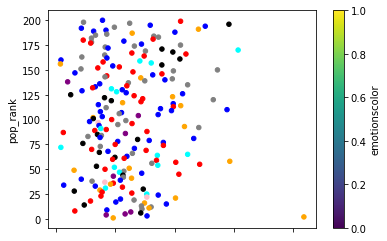

In [16]:
#Visualization of scatter chart ordered by popularity with breakdown of emotions - no recognizable trend 
df_group.plot.scatter(x = "emotions_sum", y = "pop_rank", c = "emotionscolor")